In [1]:
import cv2
import math
import numpy as np
from matplotlib import pyplot as plt
plt.rcParams['figure.figsize'] = [15, 10]

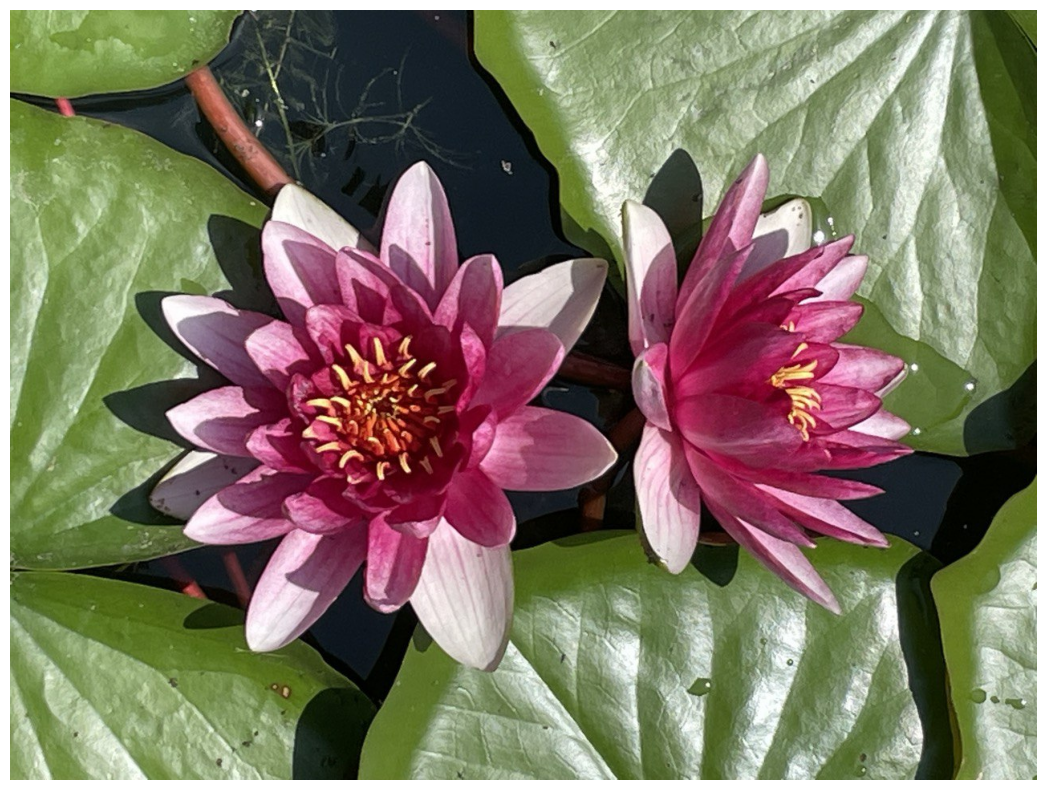

In [2]:
# Load image
img = cv2.imread('503.jpg')

# Convert it to RGB
img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

# Plot it
plt.imshow(img_rgb)
plt.axis('off')
plt.show()

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Main Colors:
[184  90 121]
[24 31 33]
[241 233 233]
[135 154 108]
[ 96 117  53]
[133  75  97]
[181 194 167]
[99  8 30]
[217 207 203]
[74 94 29]
[157 171 137]
[12 13  4]
[116 137  82]
[218 140 170]
[49 54 42]
[135  34  68]
colors = np.array([
    [184  90 121],
    [24 31 33],
    [241 233 233],
    [135 154 108],
    [ 96 117  53],
    [133  75  97],
    [181 194 167],
    [99  8 30],
    [217 207 203],
    [74 94 29],
    [157 171 137],
    [12 13  4],
    [116 137  82],
    [218 140 170],
    [49 54 42],
    [135  34  68],
])


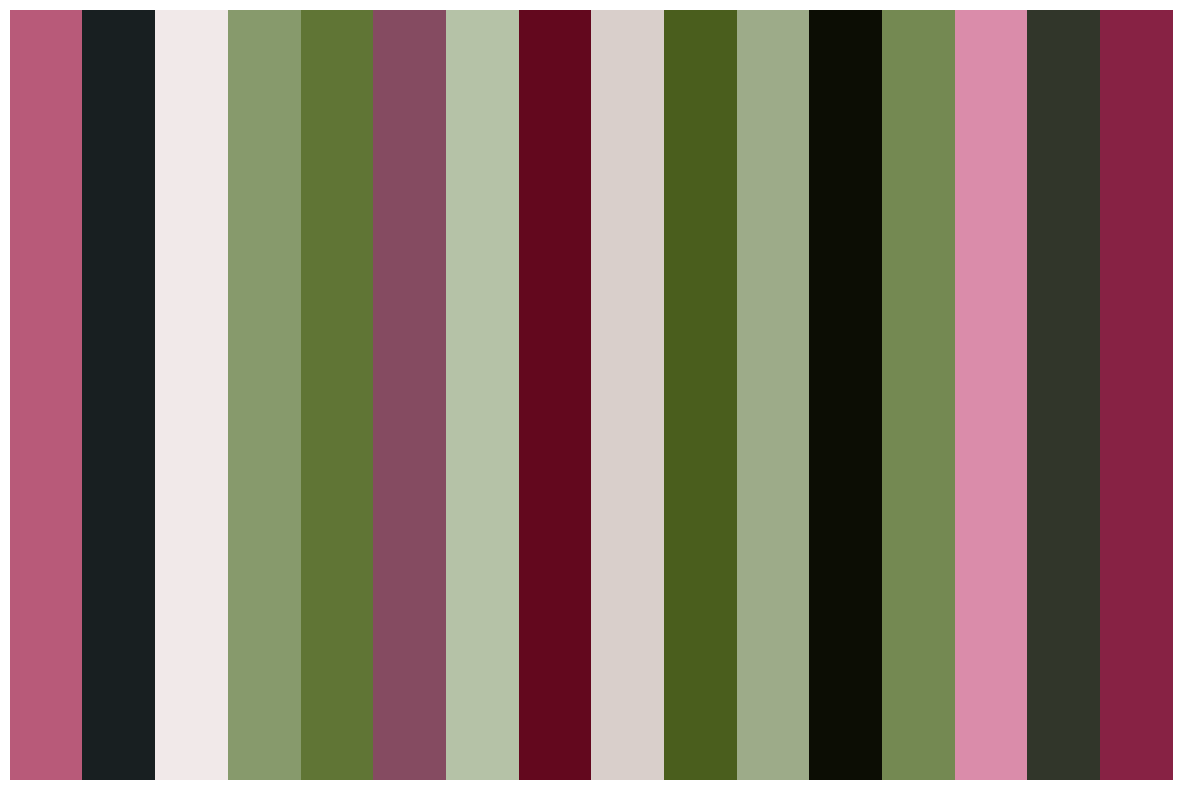

In [4]:
import numpy as np
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import cv2

def find_main_colors(image_path, num_colors=16):
    image = cv2.imread(image_path)
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    pixels = image.reshape(-1, 3)
    kmeans = KMeans(n_clusters=num_colors)
    kmeans.fit(pixels)
    colors = kmeans.cluster_centers_

    return colors.astype(int)

image_path = '503.jpg'
main_colors = find_main_colors(image_path)
print("Main Colors:")
for color in main_colors:
    print(color)

# matrix colors
print("colors = np.array([")
for color in main_colors:
    print(f"    {color},")
print("])")

plt.imshow([main_colors], aspect='auto')
plt.axis('off')
plt.show()



/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


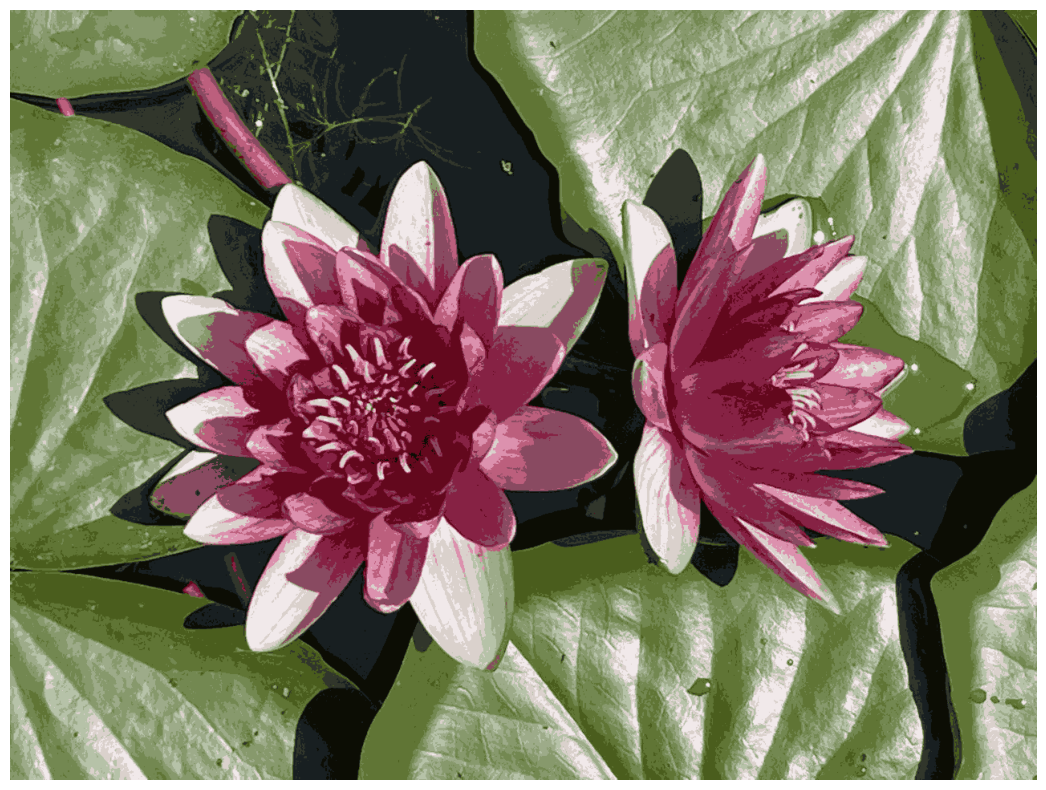

In [7]:
import numpy as np
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import cv2

def find_main_colors(image_path, num_colors=16):
    image = cv2.imread(image_path)
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    pixels = image.reshape(-1, 3)
    kmeans = KMeans(n_clusters=num_colors)
    kmeans.fit(pixels)
    colors = kmeans.cluster_centers_

    return colors.astype(int)

def quantize_image(img, colors):
    # Cast the image to float
    img = img.astype(np.float32)

    # Prepare for quantization
    rows, cols, channels = img.shape
    quantized = np.zeros_like(img)

    # Apply quantization
    for r in range(rows):
        for c in range(cols):
            # Extract the original pixel value
            pixel = img[r, c]

            # Find the closest colour from the pallette (using absolute value/Euclidean distance)
            # Note: You may need more than one line of code here
            distances = np.linalg.norm(colors - pixel, axis=1)
            closest_index = np.argmin(distances)
            new_pixel = colors[closest_index]

            # Apply quantization
            quantized[r, c, :] = new_pixel

    return quantized

# test image
image_path = '503.jpg'

# main colors
main_colors = find_main_colors(image_path)

# read image
image = cv2.imread(image_path)
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

# image quantization
quantized_image = quantize_image(image, main_colors)

# result
plt.imshow(quantized_image.astype(np.uint8))
plt.axis('off')
plt.show()



In [8]:
# Compute average quantization error
avg_quant_error = np.mean(np.abs(img - quantized))

In [9]:
def closest_color(pixel, palette):
    min_dist = float('inf')
    closest = None
    for color in palette:
        dist = np.linalg.norm(pixel - color)
        if dist < min_dist:
            min_dist = dist
            closest = color
    return closest

In [18]:
# Make a temporal copy of the original image, we will need it for error diffusion
img_tmp = np.copy(img)
dithering = np.zeros_like(img)

for r in range(1, rows - 1):
    for c in range(1, cols - 1):
        # Extract the original pixel value
        pixel = img_tmp[r, c, :]

        # Find the closest color from the palette (using absolute value/Euclidean distance)
        new_pixel = closest_color(pixel, colors)

        # Compute quantization error
        quant_error = pixel - new_pixel

        # Diffuse the quantization error according to the FS diffusion matrix
        img_tmp[r, c + 1, :] += quant_error * 7 / 16
        img_tmp[r + 1, c - 1, :] += quant_error * 3 / 16
        img_tmp[r + 1, c, :] += quant_error * 5 / 16
        img_tmp[r + 1, c + 1, :] += quant_error * 1 / 16

        # Apply dithering
        dithering[r, c, :] = new_pixel



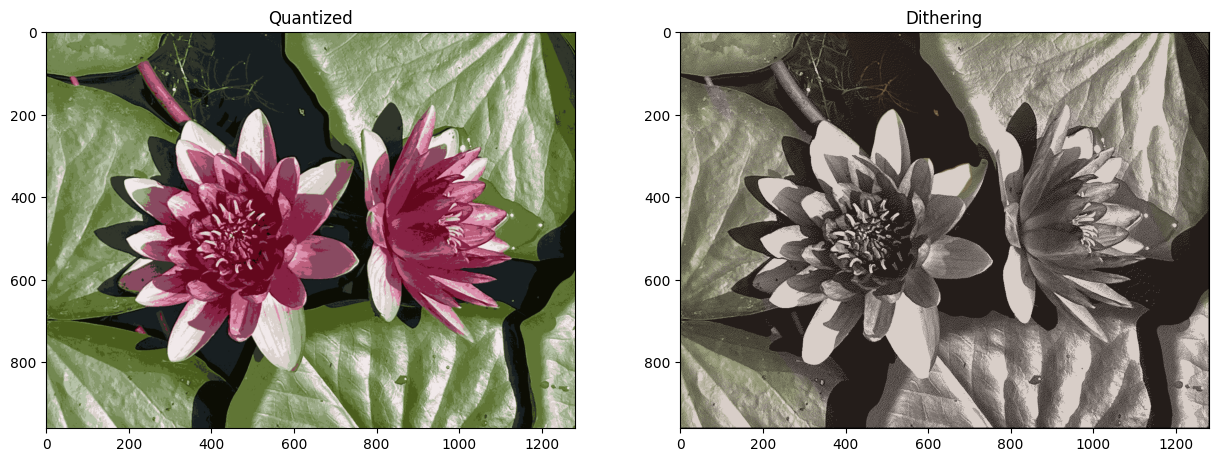

In [21]:
# Show quantized image (don't forget to cast back to uint8)
plt.subplot(121), plt.imshow(quantized_image.astype(np.uint8))
plt.title('Quantized')
plt.subplot(122), plt.imshow(dithering.astype(np.uint8))
plt.title('Dithering')
plt.show()

# New section